# Load cells info


In [1]:
import numpy as np
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
from bluepysnap import Circuit
from bluepysnap.bbp import Cell

CircuitPath = 'O1_data_physiology/' # edges files not inclued in https://github.com/FernandoSBorges/
circuit_path = CircuitPath + 'circuit_config.json'
circuit = Circuit(circuit_path)
cells = circuit.nodes["S1nonbarrel_neurons"]
nodesinfo = cells.get()

%matplotlib inline

In [2]:
nodesinfo[nodesinfo['layer'] == '4'].head()

,etype,exc_mini_frequency,hexagon,inh_mini_frequency,layer,me_combo,model_template,model_type,morph_class,morphology,...,x,x_new,y,y_new,z,z_new,@dynamics:holding_current,@dynamics:input_resistance,@dynamics:resting_potential,@dynamics:threshold_current
node_ids,,,,,,,,,,,,,,,,,,,,,
108727,dSTUT,0.010108,2,0.233243,4,dSTUT_L4BP_L4_BP_4_C300797C-I1_-_Scale_x1.000_...,hoc:dSTUT_L4BP,biophysical,INT,C300797C-I1_-_Scale_x1.000_y0.975_z1.000_-_Clo...,...,3918.383222,345.100991,-882.079924,368.523207,-1946.094942,1431.980963,-0.048744,103.355850,-77.048584,0.092756
108728,bAC,0.010108,1,0.233243,4,bAC_L23BTC_L4_BP_4_rp140319_ChC_3_idA_-_Scale_...,hoc:bAC_L23BTC,biophysical,INT,rp140319_ChC_3_idA_-_Scale_x1.000_y0.975_z1.00...,...,4140.810336,179.239589,-766.305463,605.707003,-2090.662966,1435.342921,-0.011682,606.258118,-76.392754,0.024155
108729,cNAC,0.010108,0,0.233243,4,cNAC_L6NGC_L4_BP_4_C300797C-I1_-_Scale_x1.000_...,hoc:cNAC_L6NGC,biophysical,INT,C300797C-I1_-_Scale_x1.000_y0.950_z1.000_-_Clo...,...,3953.899058,722.166787,-1279.341226,593.262166,-2143.970161,1357.507449,-0.025396,385.013672,-74.105980,0.033770
108730,cACint,0.010108,0,0.233243,4,cACint_L4CHC_L4_BP_4_rp140319_ChC_3_idA_-_Scal...,hoc:cACint_L4CHC,biophysical,INT,rp140319_ChC_3_idA_-_Scale_x1.000_y0.975_z1.00...,...,4214.386218,740.411420,-1362.666051,842.778874,-2201.251811,1481.951494,-0.014442,636.180054,-73.075333,0.015156
108731,cACint,0.010108,0,0.233243,4,cACint_L4CHC_L4_BP_4_rp140319_ChC_3_idA_-_Scal...,hoc:cACint_L4CHC,biophysical,INT,rp140319_ChC_3_idA_-_Scale_x1.000_y1.025_z1.00...,...,4184.420803,714.604811,-1328.656268,916.399225,-2366.952165,1328.898361,-0.014949,620.984924,-72.957344,0.015535


In [3]:
nodesinfo.keys()

Index(['etype', 'exc_mini_frequency', 'hexagon', 'inh_mini_frequency', 'layer',
       'me_combo', 'model_template', 'model_type', 'morph_class', 'morphology',
       'mtype', 'orientation_w', 'orientation_x', 'orientation_y',
       'orientation_z', 'region', 'synapse_class', 'x', 'x_new', 'y', 'y_new',
       'z', 'z_new', '@dynamics:holding_current', '@dynamics:input_resistance',
       '@dynamics:resting_potential', '@dynamics:threshold_current'],
      dtype='object')

In [4]:
def distance3D(gidpre,gidpost):
    return np.sqrt(np.power(nodesinfo['x'][gidpre]-nodesinfo['x'][gidpost],2)+np.power(nodesinfo['y'][gidpre]-nodesinfo['y'][gidpost],2)+np.power(nodesinfo['z'][gidpre]-nodesinfo['z'][gidpost],2))

def distance2D(gidpre,gidpost):
    return np.sqrt(np.power(nodesinfo['x'][gidpre]-nodesinfo['x'][gidpost],2)+np.power(nodesinfo['y'][gidpre]-nodesinfo['y'][gidpost],2))

def distance2Dmean(gidpre, mean_x, mean_y):
    return np.sqrt(np.power(nodesinfo['x_new'][gidpre]-mean_x,2)+np.power(nodesinfo['y_new'][gidpre]-mean_y,2))

print(cells.property_values(Cell.REGION))

mtypes = sorted(cells.property_values(Cell.MTYPE))

i = 0
mntypes = {}
for mn in sorted(mtypes):
    mntypes[mn] = i
    i+=1

{'S1DZ', 'S1FL', 'S1J'}


In [5]:
f = open('node_sets.json')
node_sets = json.load(f)

mean_x, mean_y = np.mean(nodesinfo['x_new']), np.mean(nodesinfo['y_new'])
node_gid = []
nodepremtype_new = []
mtype_new = []


node_gid = []
hoclist = []
Morpholist = []
node_threshold_current = []
node_holding_current = []


hex = 'hex0'
for gid in node_sets['hex0']['node_id']:
# for gid in [117619, 142340, 142768, 142891, 141786,138337, 142077, 138315, 141829, 142671, 142352, 138475, 141536, 142859, 142058, 142814]:
# for gid in [141766, 138220, 108767, 108729, 108749, 138433, 141757, 141803, 138337]:
    if 'L4_' in nodesinfo['mtype'][gid] and distance2Dmean(gid, mean_x, mean_y) > 0.0 and distance2Dmean(gid, mean_x, mean_y) < 50.0 and 'INH' in nodesinfo['synapse_class'][gid]:
        nodepremtype_new.append(mntypes[nodesinfo['mtype'][gid]])
        if nodesinfo['mtype'][gid] not in mtype_new:
            mtype_new.append(nodesinfo['mtype'][gid])

        iV70 = (-73.0 - nodesinfo['@dynamics:resting_potential'][gid])/nodesinfo['@dynamics:input_resistance'][gid]

        # print(len(node_gid),gid,nodesinfo['synapse_class'][gid],nodesinfo['mtype'][gid],nodesinfo['model_template'][gid],nodesinfo['morphology'][gid],hex,distance2Dmean(gid, mean_x, mean_y))
        print("%d \t%d %s %s %.1f %.2f %.1f %.2f" % (len(node_gid),gid,nodesinfo['synapse_class'][gid],nodesinfo['mtype'][gid], 
                                                     1000*(nodesinfo['@dynamics:threshold_current'][gid]+nodesinfo['@dynamics:holding_current'][gid]-iV70),nodesinfo['@dynamics:resting_potential'][gid],
                                                     1000*iV70,nodesinfo['@dynamics:input_resistance'][gid]))

        current1 = cells.get(gid,['@dynamics:threshold_current']).values[0]
        holding_current1 = cells.get(gid,['@dynamics:holding_current']).values[0]
        # print("%d %.5f %.5f" % (gid,current1,holding_current1))

        node_gid.append(gid)
        hoclist.append(nodesinfo['model_template'][gid][4:])
        Morpholist.append(nodesinfo['morphology'][gid])
        node_threshold_current.append(current1)
        node_holding_current.append(holding_current1)



# non central col
# for hex in node_sets['hex_O1']:
#     for gid in node_sets[hex]['node_id']:
#         if 'L4' in nodesinfo['mtype'][gid] and distance2Dmean(gid, mean_x, mean_y) > 500.0 and distance2Dmean(gid, mean_x, mean_y) < 502.0:
#             node_gid.append(gid)
#             nodepremtype_new.append(mntypes[nodesinfo['mtype'][gid]])
#             if nodesinfo['mtype'][gid] not in mtype_new:
#                 mtype_new.append(nodesinfo['mtype'][gid])

#             print(len(node_gid),gid,nodesinfo['mtype'][gid],hex,distance2Dmean(gid, mean_x, mean_y))

0 	117396 INH L4_NGC 9.3 -73.69 3.1 220.62
1 	117619 INH L4_SBC 14.6 -73.32 1.2 271.43
2 	138315 INH L4_NBC 36.5 -73.69 6.6 104.91
3 	138402 INH L4_NBC 2.2 -73.27 1.0 276.61
4 	138475 INH L4_NBC 41.3 -78.39 30.1 178.85
5 	141838 INH L4_MC 2.2 -69.37 -15.5 233.46
6 	142058 INH L4_MC 23.5 -71.88 -7.2 155.31
7 	142207 INH L4_MC 6.5 -71.32 -4.6 361.26
8 	142232 INH L4_MC 11.1 -69.46 -11.7 303.68
9 	142352 INH L4_LBC 21.6 -70.93 -7.6 270.26
10 	142695 INH L4_LBC 129.9 -78.91 160.9 36.72
11 	142804 INH L4_LBC 208.2 -79.41 180.9 35.44
12 	142872 INH L4_LBC 4.2 -73.50 1.0 522.24


# Testing over all reconstruct cells

In [6]:
from netpyne import specs, sim

# Network parameters
netParams = specs.NetParams()  # object of class NetParams to store the network parameters

In [7]:
cellName_list = {}
cellName_list2 = []
gid_list = {}

Epops = []
Ipops = []

cellName_list2 = []

# node_gid = [139867, 141213, 141369, 133426, 135956, 137858, 114264, 114284, 115007]

node_gid

for gid in node_gid:
# for gid in [108767, 141766, 138433, 139867, 141213, 141369, 133426, 135956, 137858, 114264, 114284, 115007]:
# for gid in [108767, 141766, 138433, 141213, 133426, 135956,  137858, 114264]:
# for gid in [114264]:

    cellName = nodesinfo['mtype'][gid] + '_' + nodesinfo['etype'][gid]

    cellName_list2.append(cellName)

    cellName_list[gid] = cellName + '_' + str(len(cellName_list2)-1)
    gid_list[cellName + '_' + str(len(cellName_list2)-1)] = gid

    print('%s %s %s 1 1 %d' % (cellName + '_' + str(len(cellName_list2)-1),nodesinfo['mtype'][gid],nodesinfo['etype'][gid],gid))

    if 'cADpyr' in cellName:
        Epops.append(cellName + '_' + str(len(cellName_list2)-1))
    else:
        Ipops.append(cellName + '_' + str(len(cellName_list2)-1))

L4_NGC_cNAC_0 L4_NGC cNAC 1 1 117396
L4_SBC_bNAC_1 L4_SBC bNAC 1 1 117619
L4_NBC_cNAC_2 L4_NBC cNAC 1 1 138315
L4_NBC_cNAC_3 L4_NBC cNAC 1 1 138402
L4_NBC_dNAC_4 L4_NBC dNAC 1 1 138475
L4_MC_cACint_5 L4_MC cACint 1 1 141838
L4_MC_cNAC_6 L4_MC cNAC 1 1 142058
L4_MC_cACint_7 L4_MC cACint 1 1 142207
L4_MC_cACint_8 L4_MC cACint 1 1 142232
L4_LBC_cACint_9 L4_LBC cACint 1 1 142352
L4_LBC_dSTUT_10 L4_LBC dSTUT 1 1 142695
L4_LBC_dSTUT_11 L4_LBC dSTUT 1 1 142804
L4_LBC_cACint_12 L4_LBC cACint 1 1 142872


In [8]:
cellsList = {}

for cellName in gid_list.keys():
    # try:
        gid = gid_list[cellName]

        MorphoName = nodesinfo['morphology'][gid] + '.asc'

        hocName = nodesinfo['model_template'][gid][4:]

        MorphologyPath = 'O1_data_physiology/morphologies/ascii'

        # MorphoName = nodesinfo['morphology'][gid]+"_gid"+str(gid)+".asc"

        print(cellName,hocName)

        cellRule = netParams.importCellParams(label=cellName, somaAtOrigin=True,
            conds={'cellType': cellName, 'cellModel': 'HH_full'},
            fileName='O1_data_physiology/emodels_hoc/' + hocName + '.hoc',
            cellName=hocName,
            cellInstance = False,
            cellArgs=[gid, MorphologyPath, MorphoName])

        # netParams.saveCellParamsRule(label=cellName, fileName=cellName+'_BBP_cellParams.json')


        # netParams.cellParams[cellName]['secs']['axon_0']['geom']['Ra'] = 2.0*netParams.cellParams[cellName]['secs']['axon_0']['geom']['Ra']

        cellsList[cellName] = [{'x': nodesinfo['x'][gid], 'y': nodesinfo['y'][gid], 'z': nodesinfo['z'][gid]}]
        # cellsList[cellName] = [{'x': nodesinfo['x'][gid] - 3000.0, 'y': nodesinfo['y'][gid] + 2000.0, 'z': nodesinfo['z'][gid] + 3500.0}]

        cellMe = cellName

        axon_pt3d_x, axon_pt3d_y, axon_pt3d_z, soma_pt3d_diam =  netParams.cellParams[cellMe]['secs']['soma_0']['geom']['pt3d'][-1]

        netParams.cellParams[cellMe]['secs']['axon_0']['geom']['diam'] = 1.0
        # netParams.cellParams[cellMe]['secs']['axon_0']['geom']['L'] = 30.0

        axon_pt3d_diam =  netParams.cellParams[cellMe]['secs']['axon_0']['geom']['diam']
        axon_pt3d_L =  netParams.cellParams[cellMe]['secs']['axon_0']['geom']['L']

        netParams.cellParams[cellMe]['secs']['axon_0']['geom']['pt3d'] = [(axon_pt3d_x, axon_pt3d_y, axon_pt3d_z, axon_pt3d_diam),
                                                                                    (axon_pt3d_x, axon_pt3d_y+axon_pt3d_L/2.0, axon_pt3d_z, axon_pt3d_diam),
                                                                                    (axon_pt3d_x, axon_pt3d_y+axon_pt3d_L, axon_pt3d_z, axon_pt3d_diam)]



        axon1_pt3d_x, axon1_pt3d_y, axon1_pt3d_z, axon_0_pt3d_diam =  netParams.cellParams[cellMe]['secs']['axon_0']['geom']['pt3d'][-1]

        # netParams.cellParams[cellMe]['secs']['axon_1']['geom']['diam'] = 0.5
        # netParams.cellParams[cellMe]['secs']['axon_1']['geom']['L'] = 30.0

        axon1_pt3d_diam =  netParams.cellParams[cellMe]['secs']['axon_1']['geom']['diam']
        axon1_pt3d_L =  netParams.cellParams[cellMe]['secs']['axon_1']['geom']['L']

        netParams.cellParams[cellMe]['secs']['axon_1']['geom']['pt3d'] = [(axon1_pt3d_x, axon1_pt3d_y, axon1_pt3d_z, axon1_pt3d_diam),
                                                                                    (axon1_pt3d_x, axon1_pt3d_y+axon1_pt3d_L/2.0, axon1_pt3d_z, axon1_pt3d_diam),
                                                                                    (axon1_pt3d_x, axon1_pt3d_y+axon1_pt3d_L, axon1_pt3d_z, axon1_pt3d_diam)]



        myelin_pt3d_x, myelin_pt3d_y, myelin_pt3d_z, axon_1_pt3d_diam =  netParams.cellParams[cellMe]['secs']['axon_1']['geom']['pt3d'][-1]

        # netParams.cellParams[cellMe]['secs']['myelin_0']['geom']['diam'] = 0.5
        netParams.cellParams[cellMe]['secs']['myelin_0']['geom']['L'] = 100.0

        myelin_pt3d_diam =  netParams.cellParams[cellMe]['secs']['myelin_0']['geom']['diam']
        myelin_pt3d_L =  netParams.cellParams[cellMe]['secs']['myelin_0']['geom']['L']

        netParams.cellParams[cellMe]['secs']['myelin_0']['geom']['pt3d'] = [(myelin_pt3d_x, myelin_pt3d_y, myelin_pt3d_z, myelin_pt3d_diam),
                                                                                    (myelin_pt3d_x, myelin_pt3d_y+myelin_pt3d_L/2.0, myelin_pt3d_z, myelin_pt3d_diam),
                                                                                    (myelin_pt3d_x, myelin_pt3d_y+myelin_pt3d_L, myelin_pt3d_z, myelin_pt3d_diam)]

    # except:
    #     pass

# cellsList

L4_NGC_cNAC_0 cNAC_L4CHC
L4_SBC_bNAC_1 bNAC_L23NGC
L4_NBC_cNAC_2 cNAC_L6NGC
L4_NBC_cNAC_3 cNAC_L4CHC
L4_NBC_dNAC_4 dNAC_L23SBC
L4_MC_cACint_5 cACint_L4CHC
L4_MC_cNAC_6 cNAC_L6BTC
L4_MC_cACint_7 cACint_L23MC
L4_MC_cACint_8 cACint_L4CHC
L4_LBC_cACint_9 cACint_L23MC
L4_LBC_dSTUT_10 dSTUT_L2SBC
L4_LBC_dSTUT_11 dSTUT_L2SBC
L4_LBC_cACint_12 cACint_L23MC


In [9]:
list(netParams.cellParams[cellMe]['secs']['soma_0']['mechs'])

['CaDynamics_DC0',
 'Ca_HVA2',
 'Ca_LVAst',
 'Ih',
 'K_Pst',
 'K_Tst',
 'NaTg',
 'SK_E2',
 'SKv3_1',
 'pas']

In [10]:
# https://github.com/suny-downstate-medical-center/S1_mouse
# Layer	     height	  from	  to
# L1         0.089      0.000	0.089
# L2         0.070      0.089	0.159
# L3         0.128      0.159	0.286
# L4         0.134      0.286	0.421
# L5         0.263      0.421	0.684
# L6         0.316      0.684	1.000
# L23        0.198      0.089	0.286
# All     1378.8 um

layer = {'1':[0.0, 0.089], '2': [0.089,0.159], '3': [0.159,0.286], '23': [0.089,0.286], '4':[0.286,0.421], '5': [0.421,0.684], '6': [0.684,1.0],
'longS1': [2.2,2.3], 'longS2': [2.3,2.4]}  # normalized layer boundaries

#Th pop
ymin={'ss_RTN_o': 1688, 'ss_RTN_m': 1766, 'ss_RTN_i': 1844, 'VPL_sTC': 2000, 'VPM_sTC': 2156, 'POm_sTC_s1': 2312}
ymax={'ss_RTN_o': 1766, 'ss_RTN_m': 1844, 'ss_RTN_i': 2000, 'VPL_sTC': 2156, 'VPM_sTC': 2312, 'POm_sTC_s1': 2624}

#------------------------------------------------------------------------------
# General network parameters
#------------------------------------------------------------------------------
netParams.scale = 1.0 # Scale factor for number of cells
netParams.sizeX = 50.0 # x-dimension (horizontal length) size in um
netParams.sizeY = 1378.8 # y-dimension (vertical height or cortical depth) size in um
netParams.sizeZ = 50.0 # z-dimension (horizontal depth) size in um
netParams.shape = 'cylinder' # cylindrical (column-like) volume
netParams.rotateCellsRandomly = True

netParams.defaultThreshold = -20.0 # spike threshold, 10 mV is NetCon default, lower it for all cells
netParams.defaultDelay = 0.1 # default conn delay (ms)
netParams.propVelocity = 300.0 #  300 μm/ms (Stuart et al., 1997)
netParams.scaleConnWeightNetStims = 0.001  # weight conversion factor (from nS to uS)

#------------------------------------------------------------------------------
# load data from S1 Raster
#------------------------------------------------------------------------------
for metype in netParams.cellParams.keys():
    layernumber = metype[1:2]
    if layernumber == '2':
        netParams.popParams[metype] = {'cellType': metype, 'cellModel': 'HH_full', 'ynormRange': layer['23'],
                                            'numCells':1, 'diversity': True}
    else:
        netParams.popParams[metype] = {'cellType': metype, 'cellModel': 'HH_full', 'ynormRange': layer[layernumber],
                                            'numCells': 1, 'diversity': True}

In [11]:
netParams.popParams.keys()

odict_keys(['L4_NGC_cNAC_0', 'L4_SBC_bNAC_1', 'L4_NBC_cNAC_2', 'L4_NBC_cNAC_3', 'L4_NBC_dNAC_4', 'L4_MC_cACint_5', 'L4_MC_cNAC_6', 'L4_MC_cACint_7', 'L4_MC_cACint_8', 'L4_LBC_cACint_9', 'L4_LBC_dSTUT_10', 'L4_LBC_dSTUT_11', 'L4_LBC_cACint_12'])

In [12]:
#------------------------------------------------------------------------------
#
# SIMULATION CONFIGURATION
#
#------------------------------------------------------------------------------

cfg = specs.SimConfig()					            # object of class SimConfig to store simulation configuration

cfg.coreneuron = False

#------------------------------------------------------------------------------
# Run parameters
#------------------------------------------------------------------------------
cfg.duration = 7.0*1e3 ## Duration of the sim, in ms
cfg.dt = 0.05
cfg.seeds = {'cell': 4321, 'conn': 4321, 'stim': 1000, 'loc': 4321}
cfg.hParams = {'celsius': 34, 'v_init': -84.0}
cfg.verbose = False
cfg.createNEURONObj = True
cfg.createPyStruct = True
cfg.cvode_active = False
cfg.cvode_atol = 1e-6
cfg.cache_efficient = True
cfg.printRunTime = 0.1

cfg.includeParamsLabel = False
cfg.printPopAvgRates = True
cfg.checkErrors = False

#--------------------------------------------------------------------------
# Recording
#--------------------------------------------------------------------------
cfg.recordCells = list(netParams.popParams.keys())
# cfg.recordTraces = {'V_soma': {'sec':'soma_0', 'loc':0.5, 'var':'v'}}  ## Dict with traces to record
cfg.recordTraces = {'V_soma': {'sec':'soma_0', 'loc':0.5, 'var':'v'},
                    # 'V_axon_0': {'sec':'axon_0', 'loc':0.5, 'var':'v'},
                    # 'V_axon_1': {'sec':'axon_1', 'loc':0.5, 'var':'v'},
                    # 'V_myelin_0': {'sec':'myelin_0', 'loc':0.5, 'var':'v'},
                    # 'V_axon_15': {'sec':'axon_15', 'loc':0.5, 'var':'v'},
                    # 'V_apic_0': {'sec':'apic_0', 'loc':0.5, 'var':'v'},
                    # 'V_apic_7': {'sec':'apic_7', 'loc':0.5, 'var':'v'},
                    # 'V_apic_64': {'sec':'apic_64', 'loc':0.5, 'var':'v'},
                    # 'V_apic_86': {'sec':'apic_86', 'loc':0.5, 'var':'v'},
                    # 'V_dend_0': {'sec':'dend_0', 'loc':0.5, 'var':'v'},
                    # 'V_dend_5': {'sec':'dend_5', 'loc':0.5, 'var':'v'},
                    }
cfg.recordStim = False
cfg.recordTime = False
cfg.recordStep = 0.05

#------------------------------------------------------------------------------
# Saving
#------------------------------------------------------------------------------
cfg.simLabel = 'v0_batch0'       #   + str(cfg.cynradNumber)
cfg.saveFolder = 'exploration/data/'+cfg.simLabel
# cfg.filename =                	## Set file output name
cfg.savePickle = False	        	## Save pkl file
cfg.saveJson = False           	## Save json file
cfg.saveDataInclude = ['simData', 'simConfig', 'net', 'netParams'] ## ['simData'] ##  ['simData'] ##, , 'simConfig', 'netParams'
cfg.backupCfgFile = None 		##
cfg.gatherOnlySimData = False	##
cfg.saveCellSecs = True
cfg.saveCellConns = True

#------------------------------------------------------------------------------
# Analysis and plotting
# ------------------------------------------------------------------------------
cfg.analysis['plotRaster'] = {'include': cfg.recordCells, 'saveFig': True, 'showFig': False,'orderInverse': True, 'timeRange': [0,cfg.duration], 'figSize': (12,4), 'fontSize':4, 'markerSize':4, 'marker': 'o', 'dpi': 300}
# cfg.analysis['plot2Dnet']   = {'include': ['presyn_L23_PC_cAD','presyn_L5_TTPC2_cAD', 'presyn_VPM_sTC','L23_PC_cAD','L5_TTPC2_cAD'],'saveFig': True, 'showConns': False, 'figSize': (24,24), 'view': 'xz', 'fontSize':16}   # Plot 2D cells xy
# cfg.analysis['plotTraces'] = {'include': cfg.recordCells, 'oneFigPer': 'trace', 'overlay': True, 'timeRange': [0,cfg.duration], 'ylim': [-100,50], 'saveFig': True, 'showFig': False, 'figSize':(24,24)}

cfg.analysis['plotTraces'] = {'include': cfg.recordCells, 'oneFigPer': 'trace', 'overlay': True, 'timeRange': [0,cfg.duration], 'saveFig': False, 'showFig': True, 'figSize':(24,4)} # , 'ylim': [-90,30] Plot recorded traces for this list of cells
# cfg.analysis['plotShape'] = {'includePre':  [ii for ii in range(10)],'includePre':  [ii for ii in range(10)], 'saveFig': True, 'showFig': True, 'figSize':(12,12)}


In [13]:
for gid in node_gid: # list_pre:

    popName1 = cellName_list[gid]
    current1 = 1.0*cells.get(gid,['@dynamics:threshold_current']).values[0]
    holding_current1 = cells.get(gid,['@dynamics:holding_current']).values[0]

    # current1 = 0.3
    # holding_current1 = 0.0

    # netParams.stimSourceParams['Input_'+str(gid)] = {'type': 'IClamp', 'del': 0.0, 'dur': 2000.0, 'amp': holding_current1}
    # netParams.stimSourceParams['Inputb_'+str(gid)] = {'type': 'IClamp', 'del': 550.0, 'dur': 600.0, 'amp':current1}

    # netParams.stimTargetParams['Input->'+str(gid)] = {'source': 'Input_'+str(gid), 'sec':'soma_0', 'loc': 0.5, 'conds': {'pop':popName1}}
    # netParams.stimTargetParams['Inputb->'+str(gid)] = {'source': 'Inputb_'+str(gid), 'sec':'soma_0', 'loc': 0.5, 'conds': {'pop':popName1}}

    # for i,current1 in enumerate([-0.100, -0.060, 0.060, 0.070, 0.100, 0.200, current1+holding_current1, current1, 0.010, -0.100]):

    iV70 = (-73.0 - nodesinfo['@dynamics:resting_potential'][gid])/nodesinfo['@dynamics:input_resistance'][gid]

    print("%.3f %.3f %.3f" % (iV70, nodesinfo['@dynamics:threshold_current'][gid]+nodesinfo['@dynamics:holding_current'][gid],nodesinfo['@dynamics:resting_potential'][gid]))

    netParams.stimSourceParams['Input_'+str(gid)] = {'type': 'IClamp', 'del': 200.0, 'dur': 10000.0, 'amp': iV70}
    netParams.stimTargetParams['Input->'+str(gid)] = {'source': 'Input_'+str(gid), 'sec':'soma_0', 'loc': 0.5, 'conds': {'pop':popName1}}

    for i,current1 in enumerate([-0.320, 0.240, 0.260, 0.400, 0.600]):
        netParams.stimSourceParams['Input_'+str(gid)+'_'+str(i)] = {'type': 'IClamp', 'del': 550.0 + i*1000.0, 'dur': 600.0, 'amp': current1}
        netParams.stimTargetParams['Input->'+str(gid)+'_'+str(i)] = {'source': 'Input_'+str(gid)+'_'+str(i), 'sec':'soma_0', 'loc': 0.5, 'conds': {'pop':popName1}}


0.003 0.012 -73.693
0.001 0.016 -73.316
0.007 0.043 -73.694
0.001 0.003 -73.268
0.030 0.071 -78.390
-0.016 -0.013 -69.373
-0.007 0.016 -71.884
-0.005 0.002 -71.322
-0.012 -0.001 -69.457
-0.008 0.014 -70.934
0.161 0.291 -78.907
0.181 0.389 -79.413
0.001 0.005 -73.497


In [14]:
netParams.stimSourceParams

{Input_117396: {'type': 'IClamp', 'del': 200.0, 'dur': 10000.0, 'amp': 0.0031410110190600595}, Input_117396_0: {'type': 'IClamp', 'del': 550.0, 'dur': 600.0, 'amp': -0.32}, Input_117396_1: {'type': 'IClamp', 'del': 1550.0, 'dur': 600.0, 'amp': 0.24}, Input_117396_2: {'type': 'IClamp', 'del': 2550.0, 'dur': 600.0, 'amp': 0.26}, Input_117396_3: {'type': 'IClamp', 'del': 3550.0, 'dur': 600.0, 'amp': 0.4}, Input_117396_4: {'type': 'IClamp', 'del': 4550.0, 'dur': 600.0, 'amp': 0.6}, Input_117619: {'type': 'IClamp', 'del': 200.0, 'dur': 10000.0, 'amp': 0.0011655298632665327}, Input_117619_0: {'type': 'IClamp', 'del': 550.0, 'dur': 600.0, 'amp': -0.32}, Input_117619_1: {'type': 'IClamp', 'del': 1550.0, 'dur': 600.0, 'amp': 0.24}, Input_117619_2: {'type': 'IClamp', 'del': 2550.0, 'dur': 600.0, 'amp': 0.26}, Input_117619_3: {'type': 'IClamp', 'del': 3550.0, 'dur': 600.0, 'amp': 0.4}, Input_117619_4: {'type': 'IClamp', 'del': 4550.0, 'dur': 600.0, 'amp': 0.6}, Input_138315: {'type': 'IClamp', 'd

In [15]:
# #------------------------------------------------------------------------------
# # Current inputs
# #------------------------------------------------------------------------------
# cfg.addIClamp = True  # decrease the transient

# cfg.IClamp = []
# cfg.IClampnumber = 0

# for pop in Epops:
#   cfg.IClamp.append({'pop': pop, 'sec': 'soma', 'loc': 0.5, 'start': 550, 'dur': 600, 'amp': 0.2}) #pA
#   cfg.IClampnumber=cfg.IClampnumber+1

# for pop in Epops:
#   cfg.IClamp.append({'pop': pop, 'sec': 'soma', 'loc': 0.5, 'start': 0, 'dur': 2000, 'amp': 0.075}) #pA
#   cfg.IClampnumber=cfg.IClampnumber+1


# for pop in Ipops:
#   cfg.IClamp.append({'pop': pop, 'sec': 'soma', 'loc': 0.5, 'start': 550, 'dur': 600, 'amp': 0.6}) #pA
#   cfg.IClampnumber=cfg.IClampnumber+1

# for pop in Ipops:
#   cfg.IClamp.append({'pop': pop, 'sec': 'soma', 'loc': 0.5, 'start': 0, 'dur': 2000, 'amp': 0.05}) #pA
#   cfg.IClampnumber=cfg.IClampnumber+1


# #------------------------------------------------------------------------------
# # Current inputs (IClamp)
# #------------------------------------------------------------------------------
# if cfg.addIClamp:
#      for j in range(cfg.IClampnumber):
#         key ='IClamp'
#         params = getattr(cfg, key, None)
#         key ='IClamp'+str(j+1)
#         params = params[j]
#         [pop,sec,loc,start,dur,amp] = [params[s] for s in ['pop','sec','loc','start','dur','amp']]

#         # add stim source
#         netParams.stimSourceParams[key] = {'type': 'IClamp', 'delay': start, 'dur': dur, 'amp': amp}

#         # connect stim source to target
#         netParams.stimTargetParams[key+'_'+pop] =  {
#             'source': key,
#             'conds': {'pop': pop},
#             'sec': sec,
#             'loc': loc}

In [16]:
sim.initialize(
    simConfig = cfg,
    netParams = netParams)  				# create network object and set cfg and net params
sim.net.createPops()               			# instantiate network populations
sim.net.createCells()              			# instantiate network cells based on defined populations
sim.net.connectCells()            			# create connections between cells based on params
sim.net.addStims() 							# add network stimulation
sim.setupRecording()              			# setup variables to record for each cell (spikes, V traces, etc)
sim.runSim()                      			# run parallel Neuron simulation


Start time:  2025-07-31 10:07:55.185598

Creating network of 13 cell populations on 1 hosts...
  Number of cells on node 0: 13 
  Done; cell creation time = 0.45 s.
Making connections...
  Number of connections on node 0: 0 
  Done; cell connection time = 0.00 s.
Adding stims...
  Number of stims on node 0: 78 
  Done; cell stims creation time = 0.02 s.
Recording 13 traces of 1 types on node 0
0.0s

Running simulation using NEURON for 7000.0 ms...
0.1s
0.2s
0.3s
0.4s
0.5s
0.6s
0.7s
0.8s
0.9s
1.0s
1.1s
1.2s
1.3s
1.4s
1.5s
1.6s
1.7s
1.8s
1.9s
2.0s
2.1s
2.2s
2.3s
2.4s
2.5s
2.6s
2.7s
2.8s
2.9s
3.0s
3.1s
3.2s
3.3s
3.4s
3.5s
3.6s
3.7s
3.8s
3.9s
4.0s
4.1s
4.2s
4.3s
4.4s
4.5s
4.6s
4.7s
4.8s
4.9s
5.0s
5.1s
5.2s
5.3s
5.4s
5.5s
5.6s
5.7s
5.8s
5.9s
6.0s
6.1s
6.2s
6.3s
6.4s
6.5s
6.6s
6.7s
6.8s
6.9s
7.0s
  Done; run time = 290.20 s; real-time ratio: 0.02.


In [17]:
sim.gatherData();                  			# gather spiking data and cell info from each node
# sim.saveData()                    			# save params, cell info and sim output to file (pickle,mat,txt,etc)#
# sim.analysis.plotData()         			# plot spike raster etc
# sim.analysis.plotSpikeStats(timeRange=[300,900], figSize=(18,6))


Gathering data...
  Done; gather time = 0.31 s.

Analyzing...
  Cells: 13
  Connections: 0 (0.00 per cell)
  Spikes: 1440 (15.82 Hz)
  Simulated time: 7.0 s; 1 workers
  Run time: 290.20 s
   L4_NGC_cNAC_0 : 18.857 Hz
   L4_SBC_bNAC_1 : 13.143 Hz
   L4_NBC_cNAC_2 : 31.143 Hz
   L4_NBC_cNAC_3 : 20.714 Hz
   L4_NBC_dNAC_4 : 21.714 Hz
   L4_MC_cACint_5 : 11.143 Hz
   L4_MC_cNAC_6 : 21.286 Hz
   L4_MC_cACint_7 : 13.143 Hz
   L4_MC_cACint_8 : 13.286 Hz
   L4_LBC_cACint_9 : 14.857 Hz
   L4_LBC_dSTUT_10 : 7.714 Hz
   L4_LBC_dSTUT_11 : 5.000 Hz
   L4_LBC_cACint_12 : 13.714 Hz


Preparing spike data...
Plotting raster...


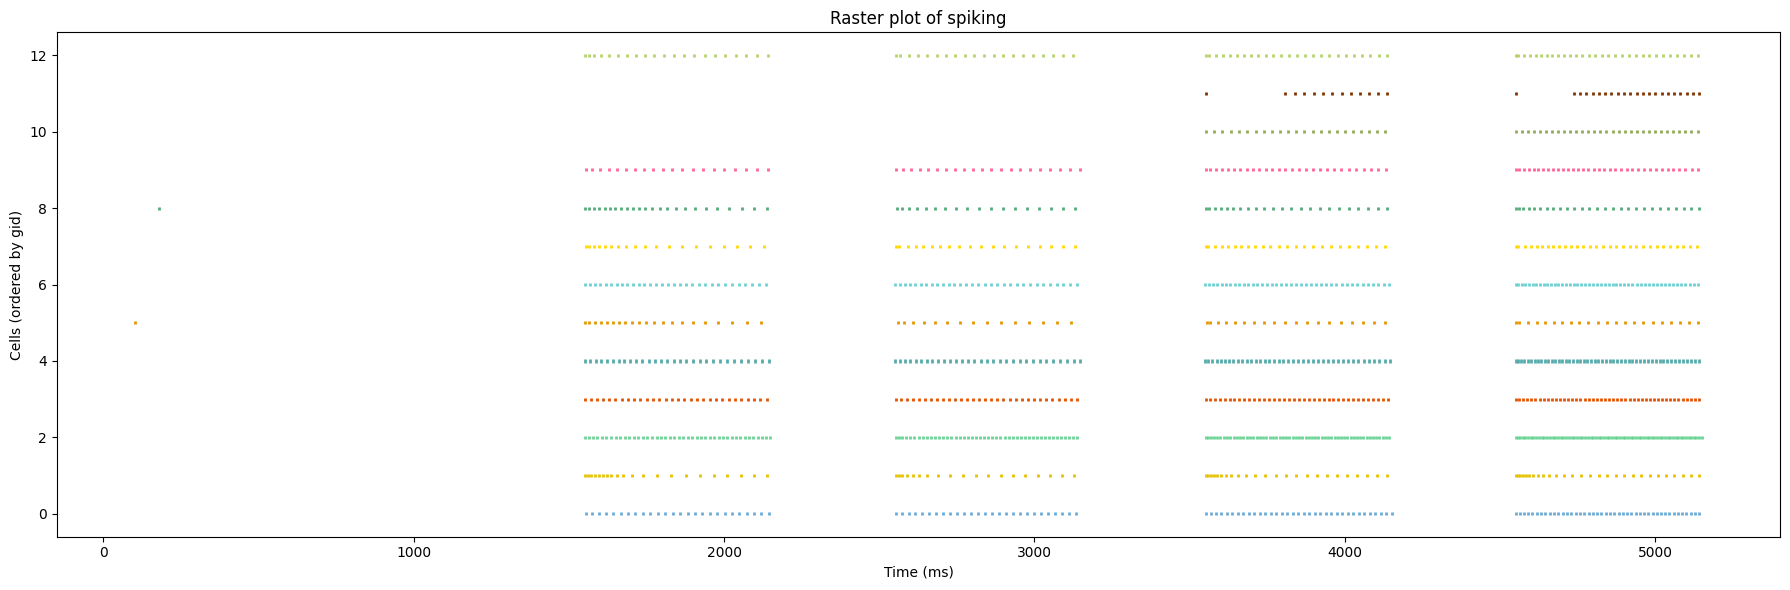

In [18]:
sim.analysis.plotRaster(timeRange=[0,7500], figSize=(18,6), popRates=False, labels = None);

Plotting recorded cell traces ... trace


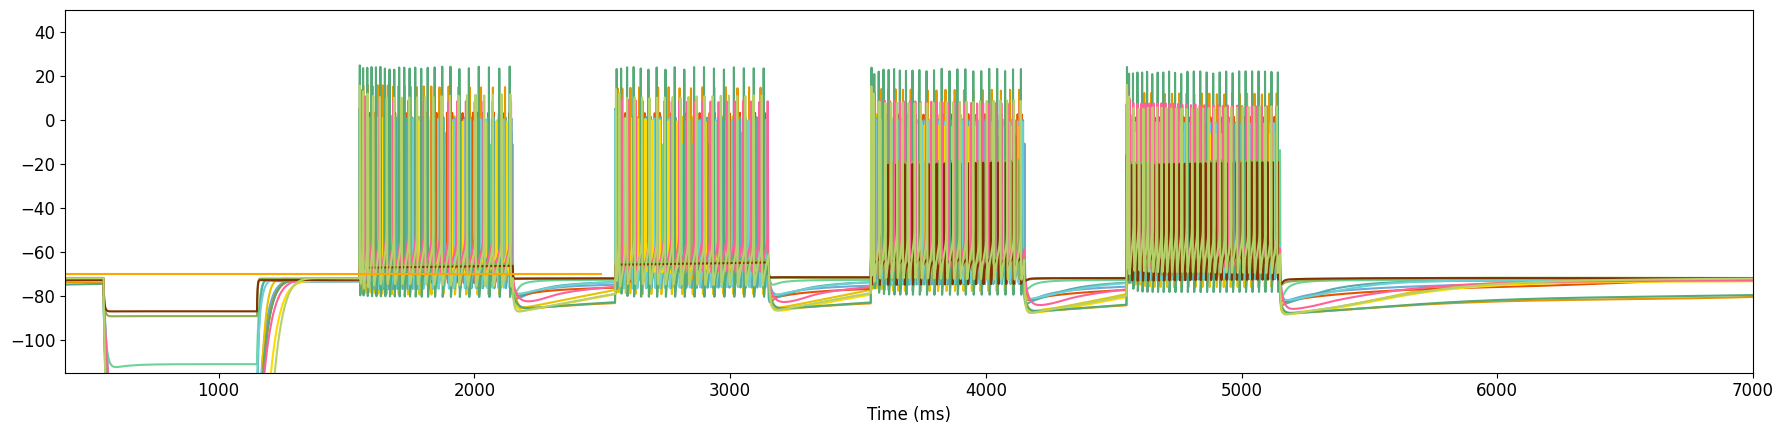

In [19]:
sim.analysis.plotTraces(include= [ii for ii in range(0,200)], timeRange=[400,7000], ylim=[-115, 50], axis=True, subtitles=False, legend=False, overlay=True, oneFigPer='trace', figSize=(18,4.5), showFig=False)
plt.hlines(xmin=0, xmax=2500, y=[-70], colors=['orange'])
plt.show()

Plotting recorded cell traces ... trace


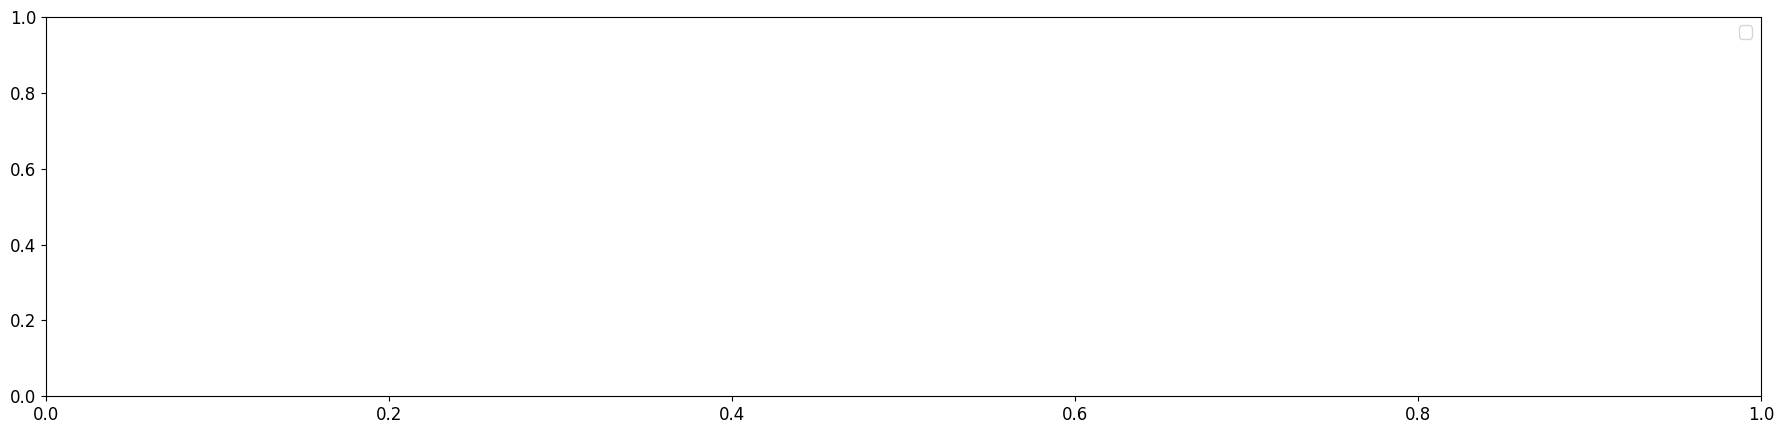

In [20]:
sim.analysis.plotTraces(include= [ii for ii in range(21,22)], timeRange=[400,6400], axis=True, overlay=True, oneFigPer='trace', figSize=(18,4.5)); #, ylim=[-80, -74]

In [21]:
    # for i,current1 in enumerate([-0.100, -0.060, 0.060, 0.070, 0.100, 0.200, current1+holding_current1, current1, 0.010, -0.100]):
    #     netParams.stimSourceParams['Input_'+str(gid)+'_'+str(i)] = {'type': 'IClamp', 'del': 550.0 + i*1000.0, 'dur': 600.0, 'amp': current1}
    #     netParams.stimTargetParams['Input->'+str(gid)+'_'+str(i)] = {'source': 'Input_'+str(gid)+'_'+str(i), 'sec':'soma_0', 'loc': 0.5, 'conds': {'pop':popName1}}

Plotting recorded cell traces ... trace


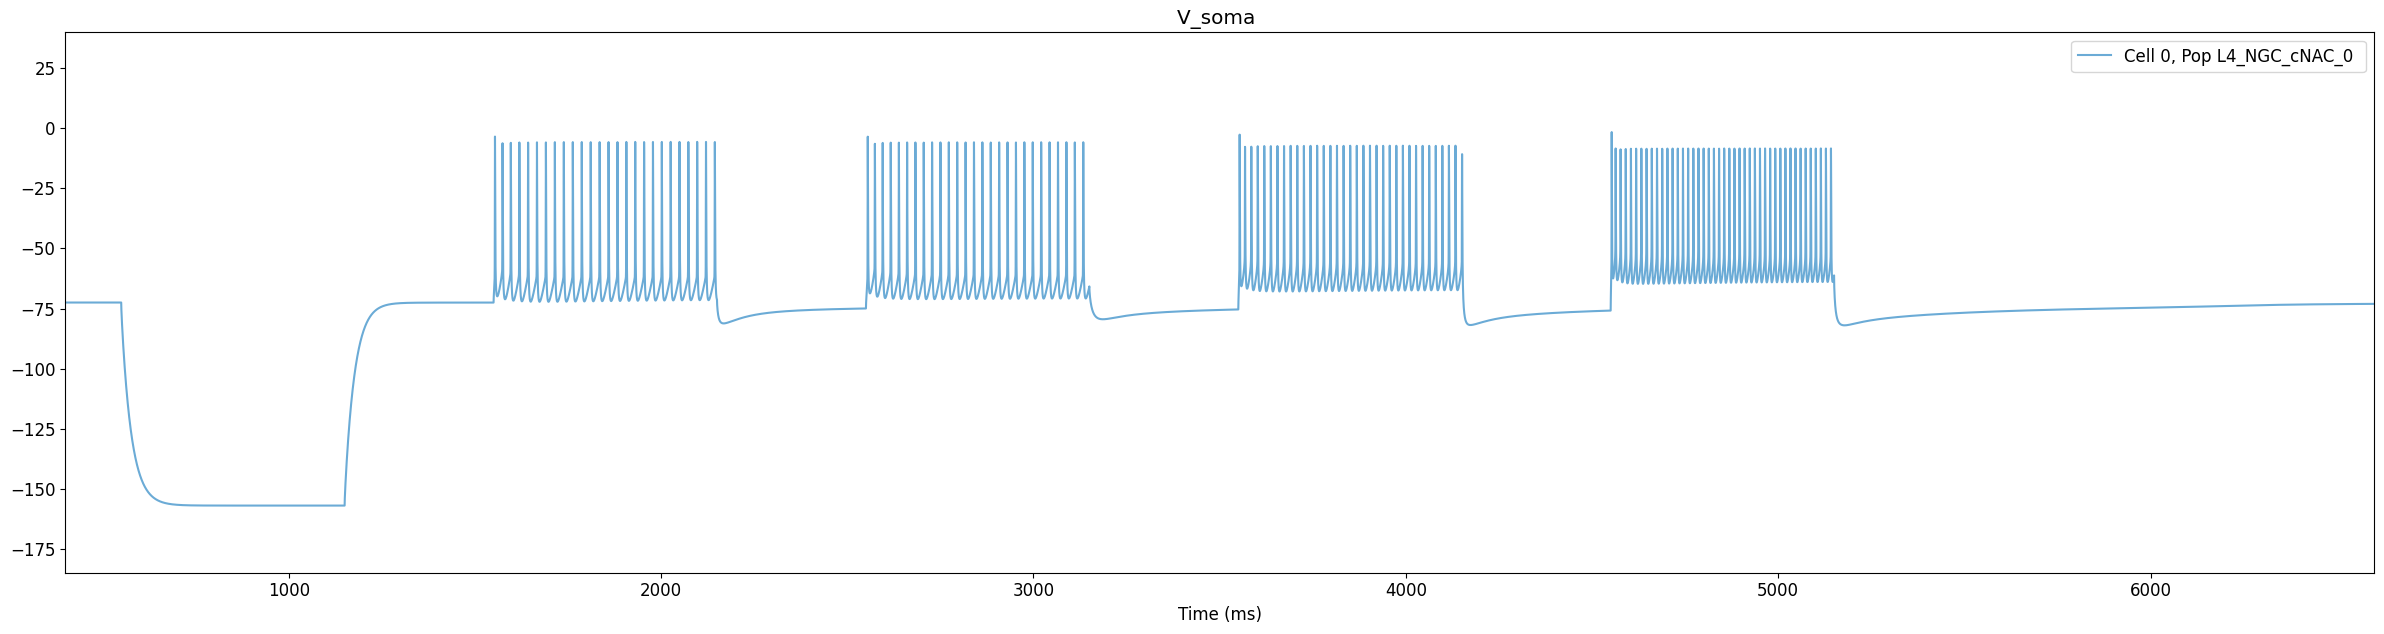

In [22]:
sim.analysis.plotTraces(include= [ii for ii in range(0,1)], timeRange=[400,6600], ylim=[-185, 40], axis=True, overlay=True, oneFigPer='trace', figSize=(24,6.5));

# Load recordings

In [23]:
# pip install openpyxl

In [24]:
import pandas as pd

excel_file_path = "Spike_trains_steps_L4_elife_Aric.xlsx"

df_rs = pd.read_excel(excel_file_path, sheet_name="RS")
df_fs = pd.read_excel(excel_file_path, sheet_name="FS")
df_rip = pd.read_excel(excel_file_path, sheet_name="Ripplets")

print("DataFrame for sheet 'RS':")
print(df_rs.head())
print("\nDataFrame for sheet 'FS':")
print(df_fs.head())
print("\nDataFrame for sheet 'Ripplets':")
print(df_rip.head())

DataFrame for sheet 'RS':
     ms    -100      60      70     100     200
0  0.00 -71.045 -70.778 -69.588 -71.480 -70.015
1  0.05 -71.060 -70.686 -69.626 -71.648 -70.061
2  0.10 -71.037 -70.587 -69.618 -71.510 -70.007
3  0.15 -71.091 -70.686 -69.649 -71.503 -69.984
4  0.20 -71.053 -70.625 -69.687 -71.617 -70.061

DataFrame for sheet 'FS':
     ms    -320     240     280     400     600
0  0.00 -68.466 -68.558 -68.886 -69.473 -69.489
1  0.05 -68.390 -68.687 -68.848 -69.450 -69.427
2  0.10 -68.336 -68.703 -68.802 -69.550 -69.359
3  0.15 -68.466 -68.695 -68.871 -69.389 -69.328
4  0.20 -68.474 -68.550 -68.932 -69.679 -69.427

DataFrame for sheet 'Ripplets':
   031820_DFI_P41  FS 5 ms stim  Field  102920_DFI_P36  RS 2 ms stim  Field.1
0            0.00       -66.475 -0.004            0.00       -65.420   -0.046
1            0.05       -66.322 -0.011            0.05       -65.404    0.010
2            0.10       -66.269  0.011            0.10       -65.414    0.074
3            0.15       -6

In [25]:
import matplotlib.pyplot as plt

(0.0, 800.0)

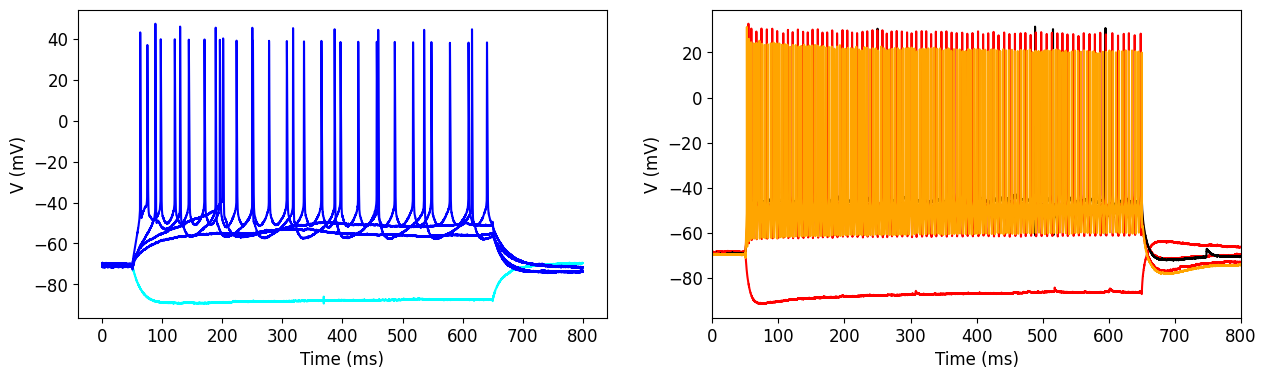

In [26]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
plt.plot(df_rs['ms'], df_rs[-100], color='cyan')
plt.plot(df_rs['ms'], df_rs[60], color='blue')
plt.plot(df_rs['ms'], df_rs[70], color='blue')
plt.plot(df_rs['ms'], df_rs[100], color='blue')
plt.plot(df_rs['ms'], df_rs[200], color='blue')
plt.ylabel('V (mV)')
plt.xlabel('Time (ms)')
# plt.xlim(0, 50)
# plt.ylim(-72, -69)

plt.subplot(1, 2, 2)
plt.plot(df_fs['ms'], df_fs[-320], color='red')
plt.plot(df_fs['ms'], df_fs[240], color='red')
plt.plot(df_fs['ms'], df_fs[280], color='black')
plt.plot(df_fs['ms'], df_fs[400], color='red')
plt.plot(df_fs['ms'], df_fs[600], color='orange')
# plt.title('FS with 200 pA step current')
# plt.plot(df_rs['ms'], list(sim.simData['V_soma']['cell_4'])[10000:10000+len(df_rs['ms'])])
# plt.plot(df_rs['ms'], list(sim.simData['V_soma']['cell_5'])[10000:10000+len(df_rs['ms'])])
plt.ylabel('V (mV)')
plt.xlabel('Time (ms)')
plt.xlim(0, 800)
# plt.ylim(-80, -65)
# plt.xlim(0, 50)
# plt.ylim(-70, -68)

## Compare Resistence (100 < R_Mohm > 300) (Delta V)

ValueError: invalid __array_struct__

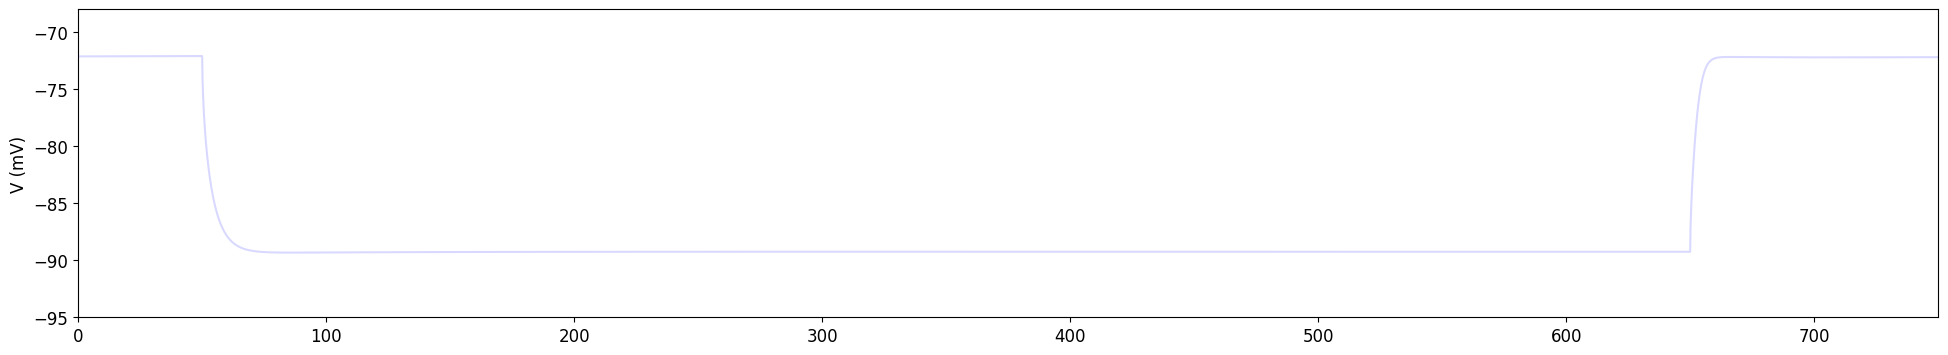

In [ ]:
plt.figure(figsize=(24, 4))
# plt.figure(figsize=(24, 72))

# plt.subplot(10, 1, 1)
# plt.plot(df_rs['ms'], df_rs[-100].values, color='cyan')
# plt.plot(df_rs['ms'], df_rs[60])
# plt.plot(df_rs['ms'], df_rs[70])
# plt.plot(df_rs['ms'], df_rs[100])
# plt.plot(df_rs['ms'], df_rs[200])
# plt.title('RS with 200 pA step current')
plt.ylabel('V (mV)')
plt.xlim(0, 750)
ii = 0
cell_i_good = []
for i in range(1, 201):
    if np.min(np.array(sim.simData['V_soma']['cell_'+str(i-1)])[10000:10000+len(df_fs['ms'])]-sim.simData['V_soma']['cell_'+str(i-1)][10000]) < -15 and np.min(np.array(sim.simData['V_soma']['cell_'+str(i-1)])[10000:10000+len(df_fs['ms'])]-sim.simData['V_soma']['cell_'+str(i-1)][10000]) > -20:
    
    # sim.simData['V_soma']['cell_'+str(i-1)][20000]-sim.simData['V_soma']['cell_'+str(i-1)][10000] < -12 and \
    # sim.simData['V_soma']['cell_'+str(i-1)][11800]-sim.simData['V_soma']['cell_'+str(i-1)][10000] < -12:
        cell_i_good.append(i)
        ii = ii + 1
        # plt.subplot(30, 1, ii)
        plt.plot(df_rs['ms'], np.array(sim.simData['V_soma']['cell_'+str(i-1)])[10000:10000+len(df_rs['ms'])], color='blue', alpha=0.15)
        # plt.plot(df_rs['ms'], df_rs[-100].values, color='cyan')
        # plt.plot(df_rs['ms'], np.array(sim.simData['V_soma']['cell_'+str(i-1)])[10000+120000:10000+120000+len(df_rs['ms'])]-sim.simData['V_soma']['cell_'+str(i-1)][10000+120000])
        plt.ylabel('V (mV)')
        plt.xlim(0, 750)
        plt.ylim(-95, -68)


plt.plot(df_rs['ms'], df_rs[-100].values, color='black')
plt.ylabel('V (mV)')
plt.xlabel('time (ms)')
plt.xlim(0, 750)
plt.grid(True)

# plt.show()

In [ ]:
df_fs

,ms,-320,240,280,400,600
0,0.00,-68.466,-68.558,-68.886,-69.473,-69.489
1,0.05,-68.390,-68.687,-68.848,-69.450,-69.427
2,0.10,-68.336,-68.703,-68.802,-69.550,-69.359
3,0.15,-68.466,-68.695,-68.871,-69.389,-69.328
4,0.20,-68.474,-68.550,-68.932,-69.679,-69.427
...,...,...,...,...,...,...
15996,799.80,-66.238,-69.641,-70.473,-72.945,-74.257
15997,799.85,-66.299,-69.633,-70.450,-72.884,-74.181
15998,799.90,-66.185,-69.656,-70.534,-73.013,-74.150
15999,799.95,-66.238,-69.603,-70.473,-72.945,-74.142


In [ ]:
len(cell_i_good)

68

In [ ]:
I = -100

mask_step = (df_rs['ms'] >= 150) & (df_rs['ms'] <= 500)

mask_rest = (df_rs['ms'] >= 0) & (df_rs['ms'] <= 50)

V_step_exp = df_rs[-100][mask_step].mean()
V_rest_exp = df_rs[-100][mask_rest].mean()
delta_V_exp = V_step_exp - V_rest_exp 
Rin_exp = delta_V_exp / I  


print(f'Resistência da célula experimental: {Rin_exp:.2f}')

Resistência da célula experimental: 0.17


In [ ]:
len(cell_i_good)

68

## Compare 1st spike time at 100 pA

(40.0, 150.0)

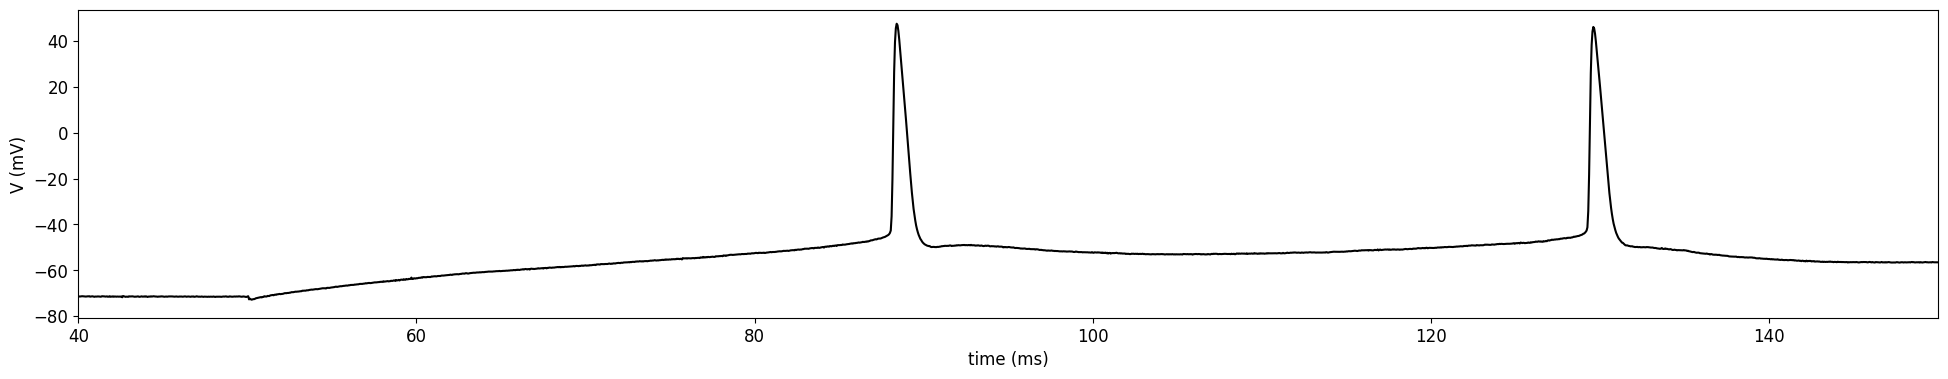

In [ ]:
# plt.figure(figsize=(24, 72))
plt.figure(figsize=(24, 4))
plt.ylabel('V (mV)')
plt.xlim(0, 750)
for ii,i in enumerate(cell_i_good):
    if np.max(np.array(sim.simData['V_soma']['cell_'+str(i-1)])[4*20000+10000:4*20000+10000+1600]) < -50:
        # plt.subplot(30, 1, ii+1)
        plt.plot(df_rs['ms'], np.array(sim.simData['V_soma']['cell_'+str(i-1)])[4*20000+10000:4*20000+10000+len(df_rs['ms'])], color='blue',alpha = 0.15)
        # plt.plot(df_rs['ms'], df_rs[60].values, color='cyan')
        # plt.plot(df_rs['ms'], np.array(sim.simData['V_soma']['cell_'+str(i-1)])[10000+120000:10000+120000+len(df_rs['ms'])]-sim.simData['V_soma']['cell_'+str(i-1)][10000+120000])
        plt.ylabel('V (mV)')
        plt.xlim(40, 150)
        # plt.xlim(0, 750)
        plt.ylim(-85, 50)

plt.plot(df_rs['ms'], df_rs[100].values, color='black')
plt.ylabel('V (mV)')
plt.xlabel('time (ms)')
plt.xlim(0, 750)
plt.xlim(40, 150)

## Compare number of spikes for 100 pA

In [ ]:
len(cell_i_good)

68

(0.0, 750.0)

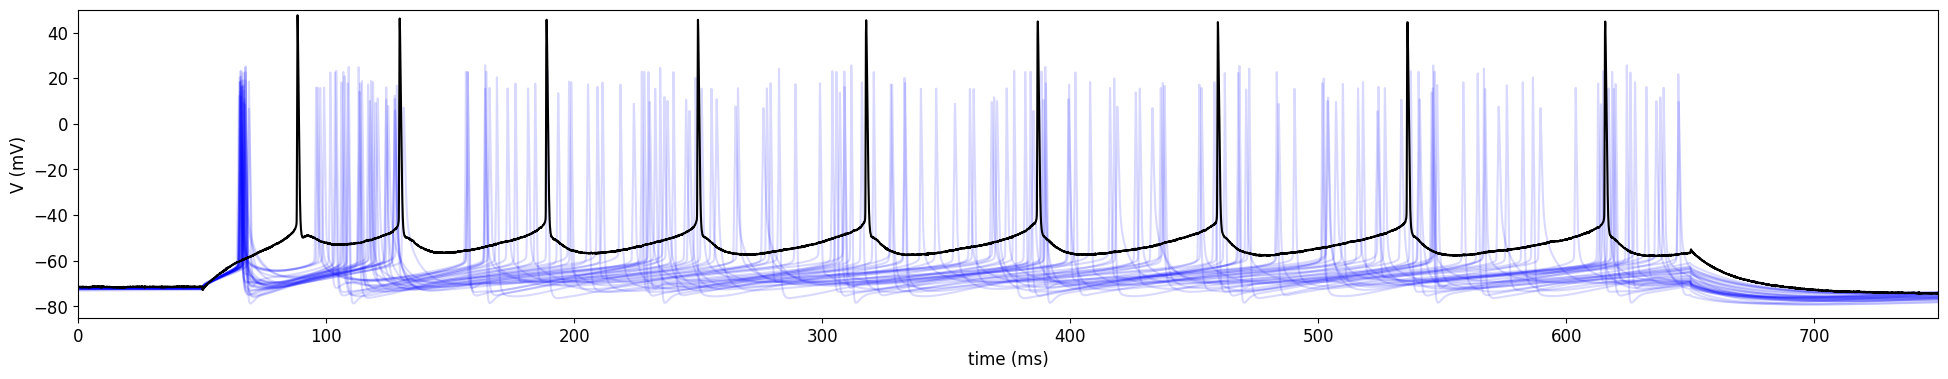

In [ ]:
# plt.figure(figsize=(24, 72))
plt.figure(figsize=(24, 4))
plt.ylabel('V (mV)')
plt.xlim(0, 750)
for ii,i in enumerate(cell_i_good):
    if np.max(np.array(sim.simData['V_soma']['cell_'+str(i-1)])[4*20000+10000+1300:4*20000+10000+1500]) > 0:
        # plt.subplot(30, 1, ii+1)
        plt.plot(df_rs['ms'], np.array(sim.simData['V_soma']['cell_'+str(i-1)])[4*20000+10000:4*20000+10000+len(df_rs['ms'])], color='blue',alpha = 0.15)
        # plt.plot(df_rs['ms'], df_rs[60].values, color='cyan')
        # plt.plot(df_rs['ms'], np.array(sim.simData['V_soma']['cell_'+str(i-1)])[10000+120000:10000+120000+len(df_rs['ms'])]-sim.simData['V_soma']['cell_'+str(i-1)][10000+120000])
        plt.ylabel('V (mV)')
        # plt.xlim(40, 150)
        plt.xlim(0, 750)
        plt.ylim(-85, 50)

plt.plot(df_rs['ms'], df_rs[100].values, color='black')
plt.ylabel('V (mV)')
plt.xlabel('time (ms)')
plt.xlim(0, 750)
# plt.xlim(40, 150)

In [ ]:
Firing = sim.analysis.calculateRate(timeRange=[4550,5150])
freq100 = []
cell_names = []
FR_RS_100pA = 9/0.600
print('%s \t= \t%.2f Hz' % ("Rs experimental at 100 pA", FR_RS_100pA))
for i, pop in enumerate(Firing[0]):
    if abs(FR_RS_100pA - Firing[1][i]) < 7.5 and i in cell_i_good:
        print('%s \t= \t%.2f Hz' % (pop, Firing[1][i]))
        freq100.append(Firing[1][i])
        cell_names.append(pop)
        
# Firing[1]

Calculating avg and peak firing rates ...
Rs experimental at 100 pA 	= 	15.00 Hz
L4_UPC_cADpyr_4 	= 	18.33 Hz
L4_UPC_cADpyr_5 	= 	10.00 Hz
L4_UPC_cADpyr_6 	= 	11.67 Hz
L4_UPC_cADpyr_7 	= 	16.67 Hz
L4_UPC_cADpyr_9 	= 	18.33 Hz
L4_UPC_cADpyr_13 	= 	11.67 Hz
L4_UPC_cADpyr_19 	= 	8.33 Hz
L4_UPC_cADpyr_20 	= 	10.00 Hz
L4_UPC_cADpyr_21 	= 	15.00 Hz
L4_UPC_cADpyr_22 	= 	11.67 Hz
L4_UPC_cADpyr_23 	= 	10.00 Hz
L4_UPC_cADpyr_26 	= 	10.00 Hz
L4_UPC_cADpyr_27 	= 	8.33 Hz
L4_UPC_cADpyr_29 	= 	10.00 Hz
L4_UPC_cADpyr_31 	= 	20.00 Hz
L4_UPC_cADpyr_33 	= 	10.00 Hz
L4_UPC_cADpyr_40 	= 	13.33 Hz
L4_UPC_cADpyr_41 	= 	13.33 Hz
L4_UPC_cADpyr_42 	= 	13.33 Hz
L4_UPC_cADpyr_43 	= 	10.00 Hz
L4_UPC_cADpyr_49 	= 	15.00 Hz
L4_UPC_cADpyr_50 	= 	10.00 Hz
L4_TPC_cADpyr_54 	= 	16.67 Hz
L4_TPC_cADpyr_56 	= 	15.00 Hz
L4_TPC_cADpyr_66 	= 	10.00 Hz
L4_TPC_cADpyr_69 	= 	11.67 Hz
L4_TPC_cADpyr_74 	= 	16.67 Hz
L4_TPC_cADpyr_76 	= 	13.33 Hz
L4_TPC_cADpyr_85 	= 	11.67 Hz
L4_TPC_cADpyr_87 	= 	15.00 Hz
L4_TPC_cADpyr_91 	= 	20.00

In [ ]:
print(cell_names)

['L4_UPC_cADpyr_4', 'L4_UPC_cADpyr_5', 'L4_UPC_cADpyr_6', 'L4_UPC_cADpyr_7', 'L4_UPC_cADpyr_9', 'L4_UPC_cADpyr_13', 'L4_UPC_cADpyr_19', 'L4_UPC_cADpyr_20', 'L4_UPC_cADpyr_21', 'L4_UPC_cADpyr_22', 'L4_UPC_cADpyr_23', 'L4_UPC_cADpyr_26', 'L4_UPC_cADpyr_27', 'L4_UPC_cADpyr_29', 'L4_UPC_cADpyr_31', 'L4_UPC_cADpyr_33', 'L4_UPC_cADpyr_40', 'L4_UPC_cADpyr_41', 'L4_UPC_cADpyr_42', 'L4_UPC_cADpyr_43', 'L4_UPC_cADpyr_49', 'L4_UPC_cADpyr_50', 'L4_TPC_cADpyr_54', 'L4_TPC_cADpyr_56', 'L4_TPC_cADpyr_66', 'L4_TPC_cADpyr_69', 'L4_TPC_cADpyr_74', 'L4_TPC_cADpyr_76', 'L4_TPC_cADpyr_85', 'L4_TPC_cADpyr_87', 'L4_TPC_cADpyr_91', 'L4_TPC_cADpyr_93', 'L4_TPC_cADpyr_94', 'L4_TPC_cADpyr_95', 'L4_TPC_cADpyr_102', 'L4_TPC_cADpyr_104', 'L4_TPC_cADpyr_108', 'L4_TPC_cADpyr_110', 'L4_TPC_cADpyr_111', 'L4_TPC_cADpyr_114', 'L4_TPC_cADpyr_116', 'L4_TPC_cADpyr_119', 'L4_TPC_cADpyr_125', 'L4_TPC_cADpyr_127', 'L4_TPC_cADpyr_128', 'L4_TPC_cADpyr_129', 'L4_TPC_cADpyr_131', 'L4_TPC_cADpyr_133', 'L4_TPC_cADpyr_135', 'L4_TPC_c

Plotting recorded cell traces ... trace


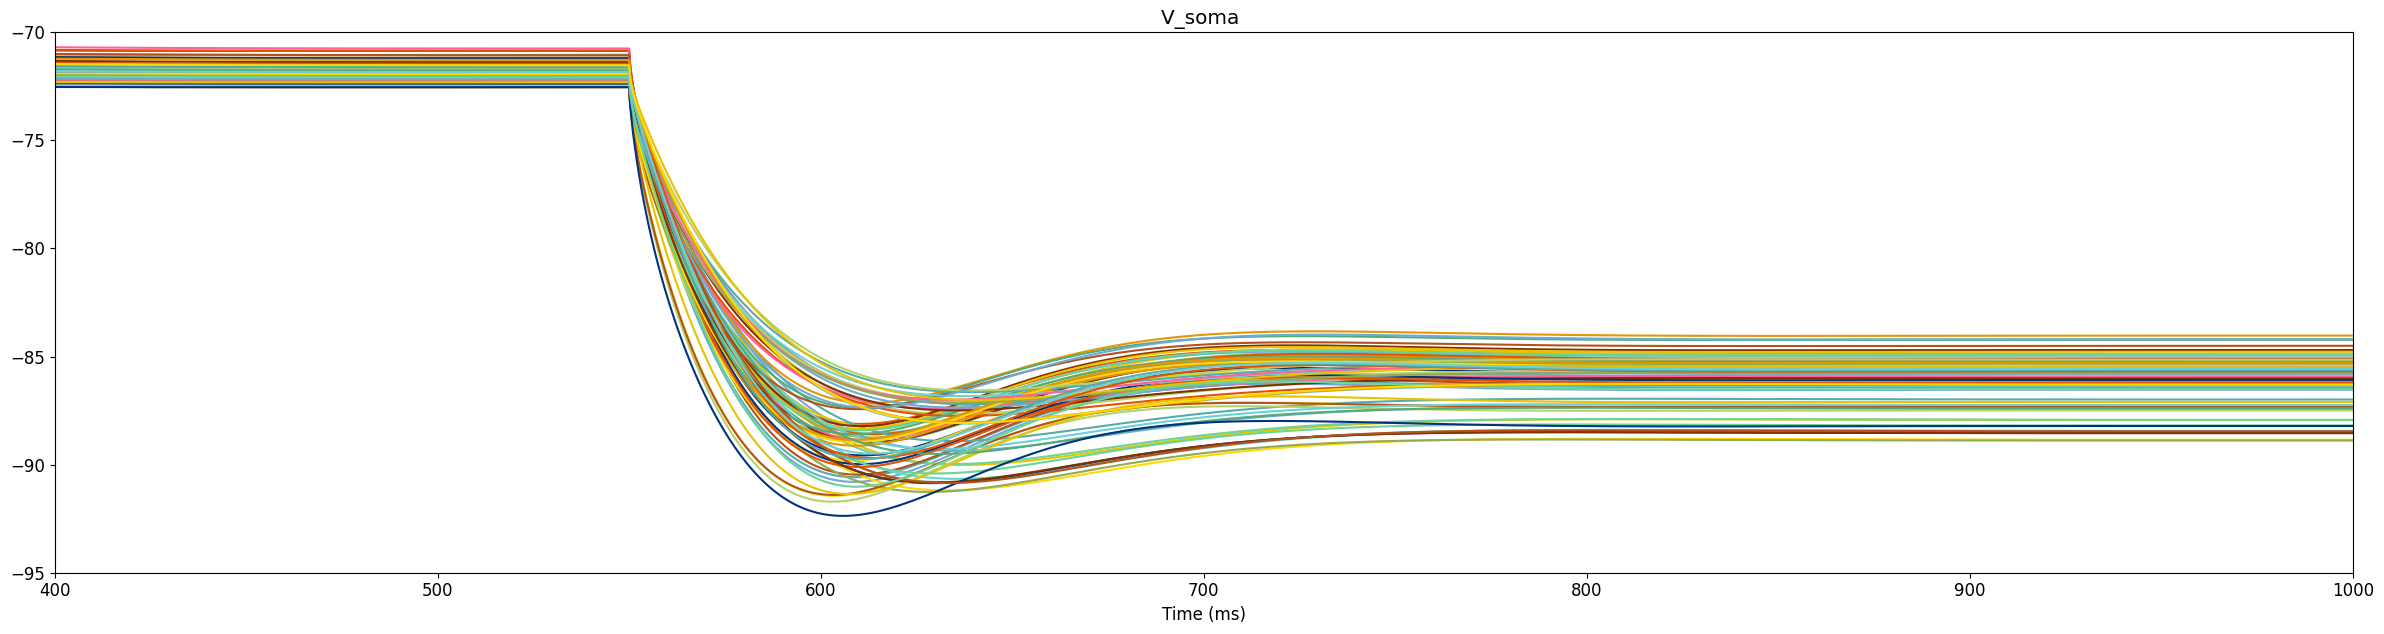

({'_trace_V_soma': <Figure size 2400x650 with 1 Axes>},
 {'tracesData': [{'t': array([ 400.  ,  400.05,  400.1 , ...,  999.9 ,  999.95, 1000.  ]),
    'cell_4_V_soma': array([-71.68331388, -71.68336077, -71.68340759, ..., -86.53390532,
           -86.53390606, -86.53390681])},
   {'t': array([ 400.  ,  400.05,  400.1 , ...,  999.9 ,  999.95, 1000.  ]),
    'cell_5_V_soma': array([-71.22053158, -71.22057974, -71.22062788, ..., -87.9375941 ,
           -87.93759395, -87.93759379])},
   {'t': array([ 400.  ,  400.05,  400.1 , ...,  999.9 ,  999.95, 1000.  ]),
    'cell_6_V_soma': array([-71.93431518, -71.93436792, -71.93442063, ..., -87.92750032,
           -87.92749997, -87.92749961])},
   {'t': array([ 400.  ,  400.05,  400.1 , ...,  999.9 ,  999.95, 1000.  ]),
    'cell_7_V_soma': array([-72.02706647, -72.02710095, -72.02713537, ..., -84.8825482 ,
           -84.88254881, -84.88254941])},
   {'t': array([ 400.  ,  400.05,  400.1 , ...,  999.9 ,  999.95, 1000.  ]),
    'cell_9_V_soma': 

In [ ]:
sim.analysis.plotTraces(include=cell_names, timeRange=[400,1000], ylim=[-95, -70], axis=True, overlay=True, oneFigPer='trace', figSize=(24,6.5))

In [ ]:
import numpy as np


time = np.arange(0, sim.cfg.duration + sim.cfg.dt, sim.cfg.dt)


index_450ms = np.argmin(np.abs(time - 450))
index_1000ms = np.argmin(np.abs(time - 1000))

print(f"Tempo mais próximo para 450ms: {time[index_450ms]:.2f} ms")
print(f"Tempo mais próximo para 1000ms: {time[index_1000ms]:.2f} ms")
print("\nVoltagens da Soma para Células Selecionadas:")

cell_voltages = {}

for cell_full_name in cell_names:
    try:
        gid = cell_full_name.split('_')[-1]
        cell_name_key = f"cell_{gid}" 

        if cell_name_key in sim.simData['V_soma']:
            soma_voltage_trace = sim.simData['V_soma'][cell_name_key]
            
            if index_1000ms < len(soma_voltage_trace):
                voltage_450ms = soma_voltage_trace[index_450ms]
                voltage_1000ms = soma_voltage_trace[index_1000ms]
                
                cell_voltages[cell_full_name] = { #
                    'V_450ms': voltage_450ms,
                    'V_1000ms': voltage_1000ms
                }
                print(f"{cell_full_name}: V_soma aos 450 ms = {voltage_450ms:.2f} mV, V_soma aos 1000 ms = {voltage_1000ms:.2f} mV")
            else:
                print(f"Aviso: O trace de voltagem para {cell_full_name} ({cell_name_key}) é muito curto para acessar 1000 ms.")
        else:
            print(f"Aviso: Dados de V_soma não encontrados para a chave: {cell_name_key} (original: {cell_full_name})")
    except Exception as e:
        print(f"Erro ao processar a célula {cell_full_name}: {e}")


Tempo mais próximo para 450ms: 450.00 ms
Tempo mais próximo para 1000ms: 1000.00 ms

Voltagens da Soma para Células Selecionadas:
L4_UPC_cADpyr_4: V_soma aos 450 ms = -71.71 mV, V_soma aos 1000 ms = -86.53 mV
L4_UPC_cADpyr_5: V_soma aos 450 ms = -71.26 mV, V_soma aos 1000 ms = -87.94 mV
L4_UPC_cADpyr_6: V_soma aos 450 ms = -71.97 mV, V_soma aos 1000 ms = -87.93 mV
L4_UPC_cADpyr_7: V_soma aos 450 ms = -72.04 mV, V_soma aos 1000 ms = -84.88 mV
L4_UPC_cADpyr_9: V_soma aos 450 ms = -71.72 mV, V_soma aos 1000 ms = -86.41 mV
L4_UPC_cADpyr_13: V_soma aos 450 ms = -72.11 mV, V_soma aos 1000 ms = -85.19 mV
L4_UPC_cADpyr_19: V_soma aos 450 ms = -71.66 mV, V_soma aos 1000 ms = -86.36 mV
L4_UPC_cADpyr_20: V_soma aos 450 ms = -72.07 mV, V_soma aos 1000 ms = -88.85 mV
L4_UPC_cADpyr_21: V_soma aos 450 ms = -71.90 mV, V_soma aos 1000 ms = -85.26 mV
L4_UPC_cADpyr_22: V_soma aos 450 ms = -72.32 mV, V_soma aos 1000 ms = -85.27 mV
L4_UPC_cADpyr_23: V_soma aos 450 ms = -71.40 mV, V_soma aos 1000 ms = -88.4

In [ ]:
I = -100 #pA
membrane_resistances = []

for cell_full_name, voltages in cell_voltages.items():
    delta_V = voltages['V_450ms'] - voltages['V_1000ms']
    
    Rm = delta_V / I
    membrane_resistances.append(Rm)


    print(f"{cell_full_name}: ΔV = {delta_V:.2f} mV, Rm = {Rm:.2f}")


L4_UPC_cADpyr_4: ΔV = 14.83 mV, Rm = -0.15
L4_UPC_cADpyr_5: ΔV = 16.68 mV, Rm = -0.17
L4_UPC_cADpyr_6: ΔV = 15.96 mV, Rm = -0.16
L4_UPC_cADpyr_7: ΔV = 12.84 mV, Rm = -0.13
L4_UPC_cADpyr_9: ΔV = 14.69 mV, Rm = -0.15
L4_UPC_cADpyr_13: ΔV = 13.08 mV, Rm = -0.13
L4_UPC_cADpyr_19: ΔV = 14.70 mV, Rm = -0.15
L4_UPC_cADpyr_20: ΔV = 16.78 mV, Rm = -0.17
L4_UPC_cADpyr_21: ΔV = 13.37 mV, Rm = -0.13
L4_UPC_cADpyr_22: ΔV = 12.95 mV, Rm = -0.13
L4_UPC_cADpyr_23: ΔV = 17.06 mV, Rm = -0.17
L4_UPC_cADpyr_26: ΔV = 12.85 mV, Rm = -0.13
L4_UPC_cADpyr_27: ΔV = 14.34 mV, Rm = -0.14
L4_UPC_cADpyr_29: ΔV = 13.38 mV, Rm = -0.13
L4_UPC_cADpyr_31: ΔV = 15.11 mV, Rm = -0.15
L4_UPC_cADpyr_33: ΔV = 15.98 mV, Rm = -0.16
L4_UPC_cADpyr_40: ΔV = 12.81 mV, Rm = -0.13
L4_UPC_cADpyr_41: ΔV = 13.08 mV, Rm = -0.13
L4_UPC_cADpyr_42: ΔV = 12.91 mV, Rm = -0.13
L4_UPC_cADpyr_43: ΔV = 15.46 mV, Rm = -0.15
L4_UPC_cADpyr_49: ΔV = 11.94 mV, Rm = -0.12
L4_UPC_cADpyr_50: ΔV = 16.71 mV, Rm = -0.17
L4_TPC_cADpyr_54: ΔV = 15.10 mV, Rm =

In [ ]:
print(list(sim.simData['V_soma'].keys())[:10]) # Imprime as 10 primeiras chaves para ter uma ideia

['cell_0', 'cell_1', 'cell_2', 'cell_3', 'cell_4', 'cell_5', 'cell_6', 'cell_7', 'cell_8', 'cell_9']


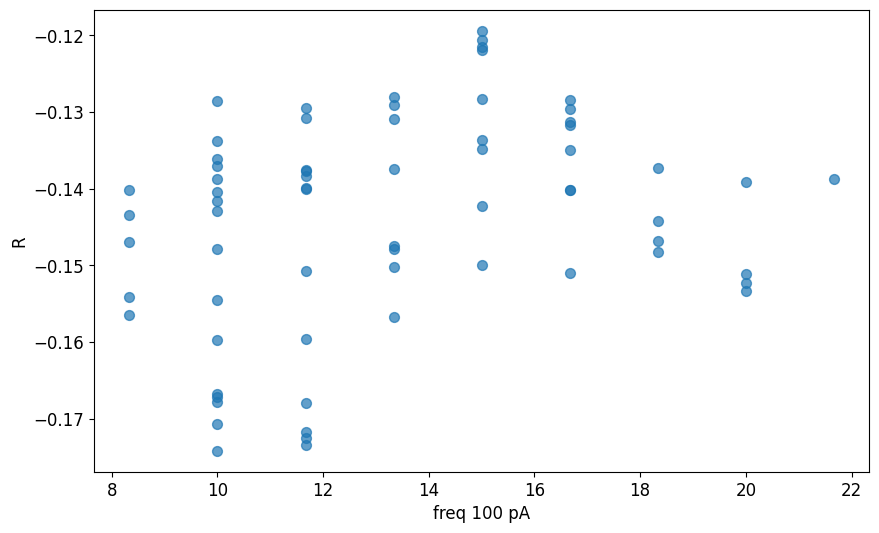

In [ ]:
import matplotlib.pyplot as plt

# freq100 = []
# membrane_resistances = []


plt.figure(figsize=(10, 6)) 
plt.scatter(freq100, membrane_resistances, s=50, alpha=0.7)
plt.ylabel('R')
plt.xlabel('freq 100 pA')

plt.grid(False)

plt.show()

(0.0, 750.0)

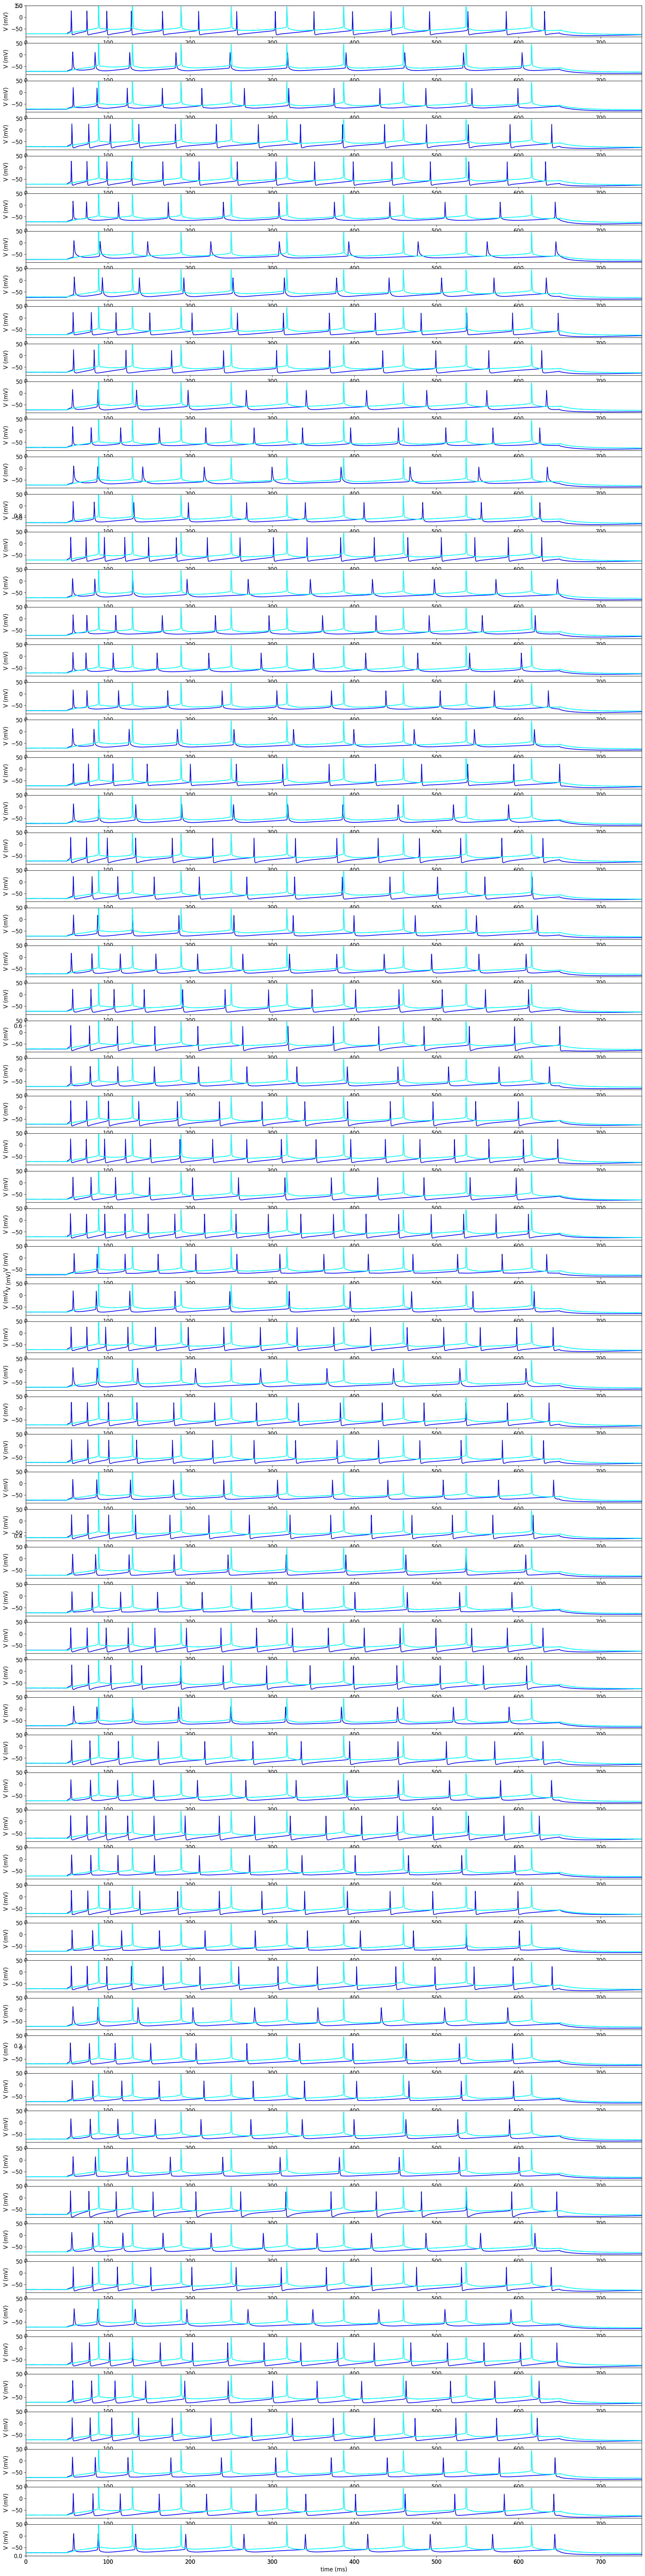

In [ ]:
plt.figure(figsize=(24, 100))
plt.ylabel('V (mV)')
plt.xlim(0, 750)
for ii, cell_full_name in enumerate(cell_names):
    cell_gid = cell_full_name.split('_')[-1]
    cell_key = f'cell_{cell_gid}'
    if cell_key in sim.simData['V_soma']:
        trace = sim.simData['V_soma'][cell_key]
        plt.subplot(len(cell_names), 1, ii+1)
        plt.plot(df_rs['ms'], np.array(trace)[5*20000+10000:5*20000+10000+len(df_rs['ms'])], color='blue')
        plt.plot(df_rs['ms'], df_rs[100].values, color='cyan')
        plt.ylabel('V (mV)')
        plt.xlim(0, 750)
        plt.ylim(-85, 50)

plt.ylabel('V (mV)')
plt.xlabel('time (ms)')
plt.xlim(0, 750)
# plt.xlim(40, 150)

In [ ]:
for name in cell_names:
    print(name)

L4_UPC_cADpyr_4
L4_UPC_cADpyr_5
L4_UPC_cADpyr_6
L4_UPC_cADpyr_7
L4_UPC_cADpyr_9
L4_UPC_cADpyr_13
L4_UPC_cADpyr_19
L4_UPC_cADpyr_20
L4_UPC_cADpyr_21
L4_UPC_cADpyr_22
L4_UPC_cADpyr_23
L4_UPC_cADpyr_26
L4_UPC_cADpyr_27
L4_UPC_cADpyr_29
L4_UPC_cADpyr_31
L4_UPC_cADpyr_33
L4_UPC_cADpyr_40
L4_UPC_cADpyr_41
L4_UPC_cADpyr_42
L4_UPC_cADpyr_43
L4_UPC_cADpyr_49
L4_UPC_cADpyr_50
L4_TPC_cADpyr_54
L4_TPC_cADpyr_56
L4_TPC_cADpyr_66
L4_TPC_cADpyr_69
L4_TPC_cADpyr_74
L4_TPC_cADpyr_76
L4_TPC_cADpyr_85
L4_TPC_cADpyr_87
L4_TPC_cADpyr_91
L4_TPC_cADpyr_93
L4_TPC_cADpyr_94
L4_TPC_cADpyr_95
L4_TPC_cADpyr_102
L4_TPC_cADpyr_104
L4_TPC_cADpyr_108
L4_TPC_cADpyr_110
L4_TPC_cADpyr_111
L4_TPC_cADpyr_114
L4_TPC_cADpyr_116
L4_TPC_cADpyr_119
L4_TPC_cADpyr_125
L4_TPC_cADpyr_127
L4_TPC_cADpyr_128
L4_TPC_cADpyr_129
L4_TPC_cADpyr_131
L4_TPC_cADpyr_133
L4_TPC_cADpyr_135
L4_TPC_cADpyr_144
L4_TPC_cADpyr_147
L4_TPC_cADpyr_150
L4_TPC_cADpyr_153
L4_TPC_cADpyr_164
L4_TPC_cADpyr_168
L4_TPC_cADpyr_171
L4_TPC_cADpyr_175
L4_SSC_cADpyr

In [ ]:
hex = 'hex0'
i = 0
for ii, gid in enumerate(node_sets['hex0']['node_id']):
    if 'L4_' in nodesinfo['mtype'][gid] and distance2Dmean(gid, mean_x, mean_y) > 0.0 and distance2Dmean(gid, mean_x, mean_y) < 25.0 and 'EXC' in nodesinfo['synapse_class'][gid]:
        i = i + 1

        print("%d \t%d %s %s %.4f %.2f %.4f %.2f" % (i,gid,nodesinfo['synapse_class'][gid],nodesinfo['mtype'][gid], 
                                                     nodesinfo['@dynamics:threshold_current'][gid],nodesinfo['@dynamics:resting_potential'][gid],
                                                     nodesinfo['@dynamics:holding_current'][gid],
                                                     nodesinfo['@dynamics:resting_potential'][gid] + nodesinfo['@dynamics:holding_current'][gid] * nodesinfo['@dynamics:input_resistance'][gid]))
                                                     

1 	109126 EXC L4_UPC 0.1281 -78.55 -0.0562 -85.71
2 	109354 EXC L4_UPC 0.0788 -76.18 -0.0505 -86.53
3 	109632 EXC L4_UPC 0.0970 -78.87 -0.0418 -85.58
4 	112531 EXC L4_UPC 0.1311 -76.17 -0.0749 -86.74
5 	112935 EXC L4_UPC 0.0928 -78.84 -0.0403 -85.56
6 	113019 EXC L4_UPC 0.0576 -77.44 -0.0304 -85.85
7 	113207 EXC L4_UPC 0.1163 -78.05 -0.0556 -85.71
8 	113680 EXC L4_UPC 0.2364 -74.86 -0.1595 -87.51
9 	114264 EXC L4_UPC 0.1887 -77.59 -0.0877 -85.66
10 	114284 EXC L4_UPC 0.2849 -75.19 -0.1723 -87.34
11 	114352 EXC L4_UPC 0.2910 -74.48 -0.1830 -86.96
12 	114599 EXC L4_UPC 0.0455 -77.41 -0.0281 -86.02
13 	115007 EXC L4_UPC 0.1212 -75.28 -0.0840 -87.59
14 	116011 EXC L4_UPC 0.2440 -78.16 -0.1042 -85.73
15 	116420 EXC L4_UPC 0.0849 -75.68 -0.0552 -86.48
16 	117199 EXC L4_UPC 0.0349 -79.38 -0.0158 -85.36
17 	118008 EXC L4_TPC 0.2137 -77.71 -0.1009 -85.74
18 	118052 EXC L4_TPC 0.0538 -79.18 -0.0232 -85.35
19 	118445 EXC L4_TPC 0.2743 -77.77 -0.1250 -85.81
20 	118551 EXC L4_TPC 0.1364 -75.18 -0.0

In [ ]:
hex = 'hex0'
i = 0
for ii, gid in enumerate(node_sets['hex0']['node_id']):
    if 'L4_' in nodesinfo['mtype'][gid] and distance2Dmean(gid, mean_x, mean_y) > 0.0 and distance2Dmean(gid, mean_x, mean_y) < 25.0 and 'EXC' in nodesinfo['synapse_class'][gid]:
        i = i + 1
        # print(len(node_gid),gid,nodesinfo['synapse_class'][gid],nodesinfo['mtype'][gid],nodesinfo['model_template'][gid],nodesinfo['morphology'][gid],hex,distance2Dmean(gid, mean_x, mean_y))
        print("%d \t%d %s %s %.4f %.2f %.4f %.2f" % (i,gid,nodesinfo['synapse_class'][gid],nodesinfo['mtype'][gid], 
                                                     nodesinfo['@dynamics:threshold_current'][gid],nodesinfo['@dynamics:resting_potential'][gid],
                                                     nodesinfo['@dynamics:holding_current'][gid],nodesinfo['@dynamics:input_resistance'][gid]))
        print("%d \t%d %s %s %.4f %.2f %.4f %.2f\n" % (i,gid,nodesinfo['synapse_class'][gid],nodesinfo['mtype'][gid], 
                                                     nodesinfo['@dynamics:threshold_current'][gid],sim.simData['V_soma']['cell_'+str(i-1)][10000],
                                                     nodesinfo['@dynamics:holding_current'][gid],(sim.simData['V_soma']['cell_'+str(i-1)][20000]-sim.simData['V_soma']['cell_'+str(i-1)][10000])/(-0.100)))
                                                     

1 	109126 EXC L4_UPC 0.1281 -78.55 -0.0562 127.30
1 	109126 EXC L4_UPC 0.1281 -78.37 -0.0562 67.16

2 	109354 EXC L4_UPC 0.0788 -76.18 -0.0505 204.69
2 	109354 EXC L4_UPC 0.0788 -75.64 -0.0505 93.90

3 	109632 EXC L4_UPC 0.0970 -78.87 -0.0418 160.13
3 	109632 EXC L4_UPC 0.0970 -78.61 -0.0418 65.34

4 	112531 EXC L4_UPC 0.1311 -76.17 -0.0749 141.17
4 	112531 EXC L4_UPC 0.1311 -75.91 -0.0749 91.09

5 	112935 EXC L4_UPC 0.0928 -78.84 -0.0403 166.91
5 	112935 EXC L4_UPC 0.0928 -78.57 -0.0403 65.55

6 	113019 EXC L4_UPC 0.0576 -77.44 -0.0304 276.21
6 	113019 EXC L4_UPC 0.0576 -76.94 -0.0304 81.02

7 	113207 EXC L4_UPC 0.1163 -78.05 -0.0556 137.93
7 	113207 EXC L4_UPC 0.1163 -77.77 -0.0556 73.41

8 	113680 EXC L4_UPC 0.2364 -74.86 -0.1595 79.30
8 	113680 EXC L4_UPC 0.2364 -74.35 -0.1595 106.73

9 	114264 EXC L4_UPC 0.1887 -77.59 -0.0877 91.97
9 	114264 EXC L4_UPC 0.1887 -77.46 -0.0877 75.66

10 	114284 EXC L4_UPC 0.2849 -75.19 -0.1723 70.51
10 	114284 EXC L4_UPC 0.2849 -74.96 -0.1723 100.50


### Ultra Fast Ripples

(0.0, 25.0)

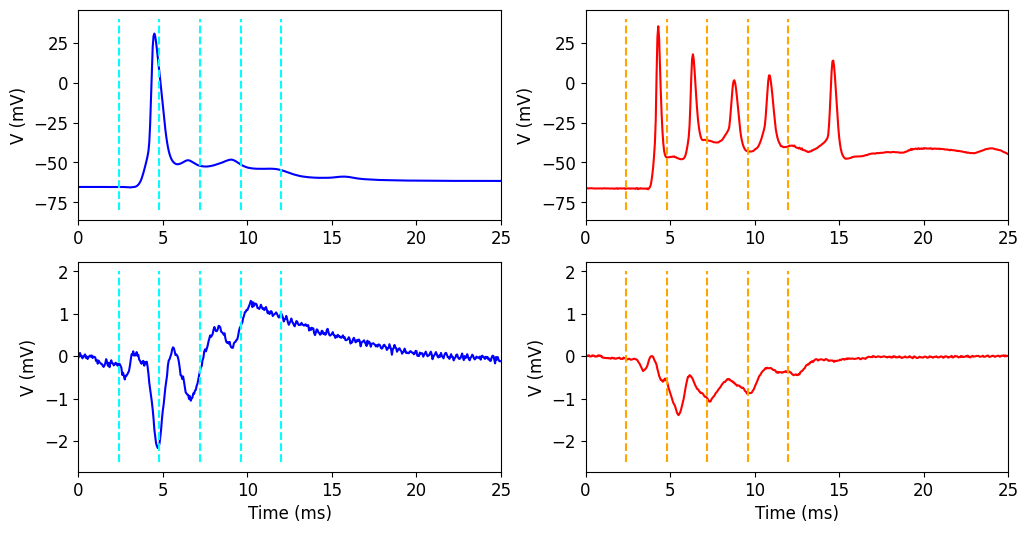

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.plot(df_rip['102920_DFI_P36'], df_rip['RS 2 ms stim'], color='blue')
plt.vlines(x=[2.4,4.8,7.2,9.6,12.0],ymin=-80, ymax=40, colors='cyan', linestyles='dashed')
plt.ylabel('V (mV)')
plt.xlim(0, 25)
plt.subplot(2, 2, 3)
plt.plot(df_rip['102920_DFI_P36'], df_rip['Field.1'], color='blue')
plt.vlines(x=[2.4,4.8,7.2,9.6,12.0],ymin=-2.5, ymax=2, colors='cyan', linestyles='dashed')
plt.ylabel('V (mV)')
plt.xlabel('Time (ms)')
plt.xlim(0, 25)

plt.subplot(2, 2, 2)
plt.plot(df_rip['031820_DFI_P41'], df_rip['FS 5 ms stim'], color='red')
plt.vlines(x=[2.4,4.8,7.2,9.6,12.0],ymin=-80, ymax=40, colors='orange', linestyles='dashed')
plt.ylabel('V (mV)')
plt.xlim(0, 25)
plt.subplot(2, 2, 4)
plt.plot(df_rip['031820_DFI_P41'], df_rip['Field'], color='red')
plt.vlines(x=[2.4,4.8,7.2,9.6,12.0],ymin=-2.5, ymax=2, colors='orange', linestyles='dashed')
plt.ylabel('V (mV)')
plt.xlabel('Time (ms)')
plt.xlim(0, 25)